<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2022_2023/Practiques/Practica7_Likelihood_Soluciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 7: Método de máxima verosimilitud (likelihood) at work**

<hr>

**Nombre:**

**NIU:**

**mail (gmail):**

<hr>

**Instrucciones**

*   Rellena tu nombre, NIU i mail (gmail, si quieres recibir los comentarios/feedback acerca de tu entrega) en la cabecera de este Notebook.
*   Renombra el Notebook como "Pr7_NIU.ipynb", donde NIU es tu NIU (*por ejemplo: Pr7_2055007.ipynb*) 
*   Al final de la clase donde se realize una entrega, descarga este cuaderno en formato .ipynb y lo tienes que subir al siguiente *drop folder*: [Link](https://cern.ch/uabmn1pr). Asegurate de que el fichero tiene el nombre correcto.
*   Solo se evaluará la parte de la entrega. Tendréis acceso a la solución de todas las partes y después de haber entregado la práctica.

<hr>

**Objectivo de la práctica** 

Vimos en clase que la función de verosimilitud (likelihood function en inglés) para un conjunto de valores $\{x_1,...,x_n\}$ que siguen una distribución de probabilidad $f$ que depende de un parámetro $\theta$ viene definida por:

$$
L(\theta) = \prod_{i=1}^n f(x_i;\theta)
$$

Si disponemos de un conjunto de valores que sabemos que siguen una distribución determinada, podemos construir el cociente de verosimilitud entre dos valores del parámetro $\theta$:

$$
Q(\theta_1) = \frac{L(\theta_1)}{L(\theta_{ref})}
$$

Si $Q>1$, es intuitivo pensar que el valor de $\theta_1$ es más probable que el valor de $\theta_{ref}$. 

### <font color='green'>**> ENTREGA: Parte 1**</font>

Tenemos 100 medidas que siguen la siguiente distribución de pareto:

$$
f(x;\alpha) = \frac{\alpha}{x^{\alpha+1}}, \alpha > 0, \quad x \in [1,\infty)
$$

una distribución que depende de un parámetro $\alpha$. Vamos a coger el valor de referencia de $\alpha_{ref}$=1+(últimos dos dígitios NIU)/100 y vamos a calcular $Q$ para un rango de valores de $\alpha$ (por ejemplo, si tu NIU es 1615432, $\alpha_{ref}$=1.32). Se trata de encontrar el máximo valor de Q, que corresponde con una estimación del parámetro $\alpha_{opt}$ que mejor se ajusta a las medidas.

Las medidas son:

```
x = [2.73132969,1.21929592,2.04302258,1.49995938,1.1865351,2.32398417,1.08277556,2.80151033,1.55646876,1.62986655,1.10269442,2.98881179,
     1.08519505,1.37804267,1.01455413,1.04229347,1.27550387,1.50647462,1.35770365,1.31164913,1.84907585,1.84474957,1.68860849,4.75516076,
     1.07313229,1.08137297,1.71225823,1.1870415,2.58066787,1.17598838,1.03824839,1.03887409,1.05131455,1.58359672,1.53241354,1.10785649,
     1.57199901,1.54132259,1.04928338,1.66617945,1.18224489,1.31698078,1.11208638,1.04422619,1.42262102,1.26360848,2.27996545,1.15668472,
     2.16406287,1.12938044,1.02825654,1.5040314,1.15382534,1.00950614,1.07241586,1.15838187,1.18258782,1.61896388,3.43153026,2.18518723,
     1.00103234,1.19055495,1.20738098,1.15562534,1.38265986,1.04521684,1.04798027,1.22760926,1.0618476,2.08672498,1.19262065,1.33103947,
     1.06377739,1.41585491,1.30806538,1.30748544,1.04321192,1.38188847,1.15718462,1.05121329,1.57976311,1.19944742,2.13362692,1.15419423,
     1.74810777,1.08282923,1.00417485,1.39527086,1.1948191,1.40233872,1.01076528,1.57026398,2.9560986,1.21978924,1.01575068,1.9394421,
     1.11541329,1.19029772,1.48326718,1.03036176]
``` 

Define en esta sección dos funciones: una función que tome la lista de medidas y un valor $\alpha$ concreto y que retorne el valor de L($\alpha$), y otra función que devuelva el factor Q($\alpha$), tomando como referencia L($\alpha$=$\alpha_{ref}$).

Imprime por pantalla el valor de referencia que tomaremos, es decir el valor de L para $\alpha$=$\alpha_{ref}$, y el valor de Q($\alpha$=$\alpha_{ref}$), que evidentemente tiene que dar el valor de 1.

Como muchas otras distribuciones, la pareto se puede encontrar en ```scipy.stats```:

```ss.pareto.rvs(b, loc=0, scale=1, size=1)```

```ss.pareto.pdf(x, b, loc=0, scale=1)``` 

En estas funciones usaremos loc=0 y scale=1. No hace falta pasar esos parámetros, ya que usaremos los que toman por defecto. En este caso, b=$\alpha$.

**[2 puntos]**

In [ ]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

x = [2.73132969,1.21929592,2.04302258,1.49995938,1.1865351,2.32398417,1.08277556,2.80151033,1.55646876,1.62986655,1.10269442,2.98881179,
     1.08519505,1.37804267,1.01455413,1.04229347,1.27550387,1.50647462,1.35770365,1.31164913,1.84907585,1.84474957,1.68860849,4.75516076,
     1.07313229,1.08137297,1.71225823,1.1870415,2.58066787,1.17598838,1.03824839,1.03887409,1.05131455,1.58359672,1.53241354,1.10785649,
     1.57199901,1.54132259,1.04928338,1.66617945,1.18224489,1.31698078,1.11208638,1.04422619,1.42262102,1.26360848,2.27996545,1.15668472,
     2.16406287,1.12938044,1.02825654,1.5040314,1.15382534,1.00950614,1.07241586,1.15838187,1.18258782,1.61896388,3.43153026,2.18518723,
     1.00103234,1.19055495,1.20738098,1.15562534,1.38265986,1.04521684,1.04798027,1.22760926,1.0618476,2.08672498,1.19262065,1.33103947,
     1.06377739,1.41585491,1.30806538,1.30748544,1.04321192,1.38188847,1.15718462,1.05121329,1.57976311,1.19944742,2.13362692,1.15419423,
     1.74810777,1.08282923,1.00417485,1.39527086,1.1948191,1.40233872,1.01076528,1.57026398,2.9560986,1.21978924,1.01575068,1.9394421,
     1.11541329,1.19029772,1.48326718,1.03036176]

# Asumo Alpha_ref = 1

def getL(x,a):
  return np.prod(ss.pareto.pdf(x,a))

def getQ(x,a,aref):
  return getL(x,a)/getL(x,1)

print("L_Ref =", getL(x,1))
print("Q_Ref =", getQ(x,1,1))

L_Ref = 4.251632546979702e-29
Q_Ref = 1.0


### <font color='green'>**> ENTREGA: Parte 2**</font>

Toma 1000 valores equidistantes de $\alpha$ entre 0.5 y 10, calcula los valores de Q para cada uno de estos valores de $\alpha$. Haz una gráfica de estos valores obtenidos frente a los valores de $\alpha$ y evalúa $\alpha_{opt}$, aquel que máximiza Q.

**[3 puntos]**

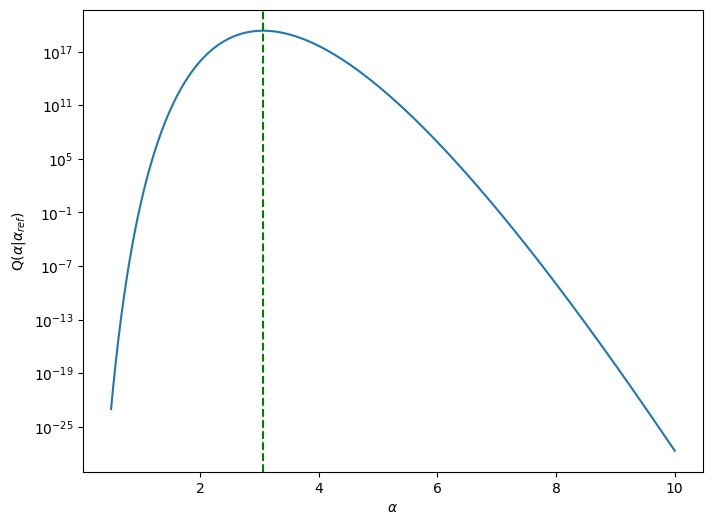


 alpha_op = 3.0581 



In [ ]:
aeq=np.linspace(0.5,10,1000)

alp=[]
Q=[]

for i in aeq:
  alp.append(i)
  Q.append(getQ(x,i,1))

plt.figure(figsize=(8,6))
plt.plot(alp,Q)
aopt=alp[Q.index(np.max(Q))]
plt.axvline(aopt, linestyle='--', color='green')
plt.yscale('log')
plt.ylabel(r'Q($\alpha$|$\alpha_{ref}$)')
plt.xlabel(r'$\alpha$')
plt.show()

print("\n alpha_op = {:3.4f} \n".format(aopt))

### <font color='green'>**> ENTREGA: Parte 3**</font>

También podemos usar la función log-likelihood para encontrar el valor de $\alpha_{mle}$, aquel valor que maximiza la función de log-likelihood. 

Implementa la función que calcula $l = ln(L)$ (log-likelihood) en función de $\alpha$, para el rango de valores de $\alpha$ considerados en el apartado anterior. Haz una gráfica de los valores de $l$ en función de $\alpha$ y evalua cual es el $\lambda_{óptimo}$ (aquel que maximiza la función $l$). 

Recuerda, que para cada $\alpha_i$ en el rango se calcula $l_i$ como:

$$
l_i = ln(L_i) = \sum_{n=1}^{N} ln f(x_n, \alpha_i)
$$

Imprime por pantalla el valor que encuentras de $\alpha_{mle}$... que debería ser un valor muy similar al que has encontrado anteriormente!

**[3 puntos]**


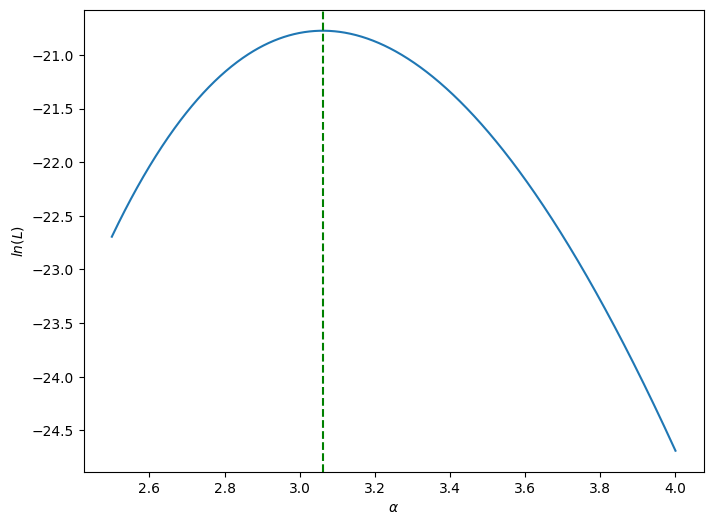


 alpha_mle = 3.0616 



In [ ]:
def logL(x,a):
  return np.cumsum(np.log(ss.pareto.pdf(x,a)))[-1]

aeq=np.linspace(2.5,4,1000)

alp=[]
lL=[]

for i in aeq:
  alp.append(i)
  lL.append(logL(x,i))

plt.figure(figsize=(8,6))
plt.plot(alp,lL)
amle=alp[lL.index(np.max(lL))]
plt.axvline(amle, linestyle='--', color='green')
plt.ylabel('$ln(L)$')
plt.xlabel(r'$\alpha$')
plt.show()

print("\n alpha_mle = {:3.4f} \n".format(amle))

### <font color='green'>**> ENTREGA: Parte 4**</font>

El valor esperado de esta función de pareto es:

$$
  E(x)=\frac{\alpha}{\alpha-1}
$$

Calcula el valor medio del conjunto de valores y compara con los valores de $\alpha$ que has encontrado en los apartados anteriores, imprimiendo los valores por pantalla.

También haz un histograma normalizadp de las medidas y añade la pdf de la función de pareto, tomando el valor de $\alpha_{mle}$ como valor óptimo.

**[2 puntos]**

<x> = 1.4677
E(X,alpha_op) = 1.4859
E(X,alpha_mle) = 1.4851



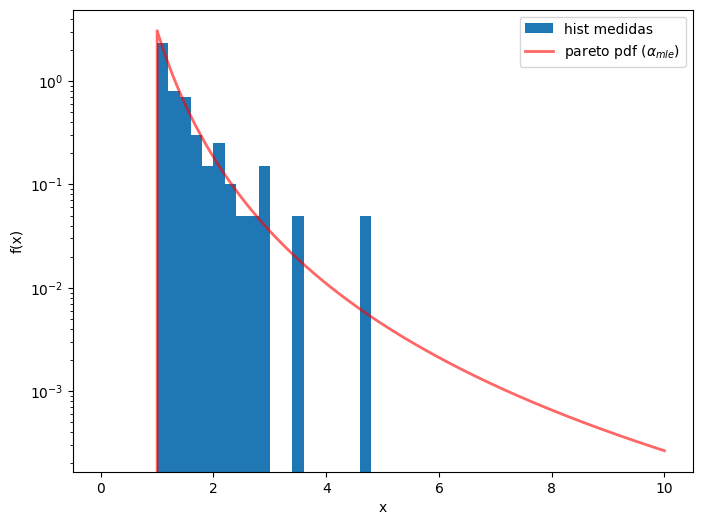

In [ ]:
print("<x> = {:3.4f}".format(np.mean(x)))
print("E(X,alpha_op) = {:3.4f}".format(aopt/(aopt-1)))
print("E(X,alpha_mle) = {:3.4f}\n".format(amle/(amle-1)))

plt.figure(figsize=(8,6))
plt.hist(x,bins=50,density=True, range=[0,10],label='hist medidas')
aa=np.linspace(0,10,10000)
plt.plot(aa, ss.pareto.pdf(aa, amle),'r-', lw=2, alpha=0.6, label=r'pareto pdf ($\alpha_{mle}$)')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.yscale('log')
plt.legend()
plt.show()

<hr> 

**Recuerda**

*   Rellena tu nombre, NIU i mail (gmail, si quieres recibir los comentarios/feedback acerca de tu entrega) en la cabecera de este Notebook.
*   Renombra el Notebook como "Pr7_NIU.ipynb", donde NIU es tu NIU (*por ejemplo: Pr7_2055007.ipynb*) 
*   Al final de la clase donde se realize una entrega, descarga este cuaderno en formato .ipynb y lo tienes que subir al siguiente *drop folder*: [Link](https://cern.ch/uabmn1pr). Asegurate de que el fichero tiene el nombre correcto.
*   Solo se evaluará la parte de la entrega. Tendréis acceso a la solución de todas las partes y después de haber entregado la práctica.

<hr>